<a href="https://colab.research.google.com/github/safi50/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Library Imports

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

### Loading Dataset

In [9]:
transactions_data = pd.read_csv('/content/credit_card_transactional_data.csv')
transactions_data.head()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,152212.22220,1.816,13.245219,NaN,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0
1,159074.44440,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,NaN,0.062966,0.130546,-0.303582,NaN,NaN,0
2,43127.77778,24.000,-9.067399,0.762501,NaN,0.052481,-0.101681,-88.000000,0.117912,NaN,0.358812,-0.367016,NaN,361.000000,0
3,156042.22220,8.000,8.728304,-0.382673,NaN,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,NaN,-1.654373,0
4,154720.00000,59.496,7.657141,0.150611,NaN,-0.034883,0.826100,0.357556,0.147640,NaN,0.080491,-0.693792,-0.308631,0.563570,0


### Visualizing Data

In [10]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  140000 non-null  float64
 1   Value      140000 non-null  float64
 2   C1         116232 non-null  float64
 3   C2         129731 non-null  float64
 4   C3         129693 non-null  float64
 5   C4         140000 non-null  float64
 6   C5         129678 non-null  float64
 7   C6         116529 non-null  float64
 8   C7         125595 non-null  float64
 9   C8         129645 non-null  float64
 10  C9         140000 non-null  float64
 11  C10        129891 non-null  float64
 12  C11        125695 non-null  float64
 13  C12        125833 non-null  float64
 14  Class      140000 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 16.0 MB


In [11]:
transactions_data['Class'].value_counts()

Class
0    139747
1       253
Name: count, dtype: int64

In [12]:
transactions_data.describe()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
count,140000.000000,140000.000000,116232.000000,129731.000000,129693.000000,140000.000000,129678.000000,116529.000000,125595.000000,129645.000000,140000.000000,129891.000000,125695.000000,125833.000000,140000.000000
mean,105334.592698,71.102883,-13.647954,-15.797094,-16.141105,0.000037,-15.540173,-13.681959,-14.760374,-16.067148,0.000119,-16.029764,-15.500080,-15.491673,0.001807
std,52763.641695,212.359700,224.599903,72.631165,74.585111,0.031540,72.120519,230.871123,235.313604,73.148242,0.215636,73.378542,237.289210,236.485713,0.042472
min,0.000000,0.000000,-2000.000000,-500.000000,-500.000000,-0.212540,-500.000000,-2000.000000,-1999.000000,-500.000000,-1.544515,-500.000000,-1998.000000,-2000.000000,0.000000
25%,60107.500002,4.400000,-6.419730,-0.262951,-9.288367,-0.017731,-0.205542,-1.149444,-0.108129,-0.033800,-0.143551,-0.509781,-0.277642,-0.596404,0.000000
50%,94276.111110,17.584000,-1.250014,-0.019520,-1.739613,-0.000140,0.000903,0.279868,0.023023,-0.005629,0.003731,-0.062414,-0.019975,0.007491,0.000000
75%,154845.833375,61.522000,5.063801,0.220734,6.436411,0.017776,0.206203,1.092373,0.109777,0.022194,0.140835,0.327266,0.224548,0.507399,0.000000
max,191985.555600,20552.928000,2000.000000,100.000000,196.401291,0.278668,100.000000,1999.000000,1998.000000,100.000000,0.858579,100.000000,2000.000000,1999.000000,1.000000


In [13]:
transactions_data.isnull().sum()

Timestamp        0
Value            0
C1           23768
C2           10269
C3           10307
C4               0
C5           10322
C6           23471
C7           14405
C8           10355
C9               0
C10          10109
C11          14305
C12          14167
Class            0
dtype: int64

### Cleaning Data

In [14]:
transactions_data = transactions_data.fillna(transactions_data.median())

### Looking for correlation between input columns

<Axes: >

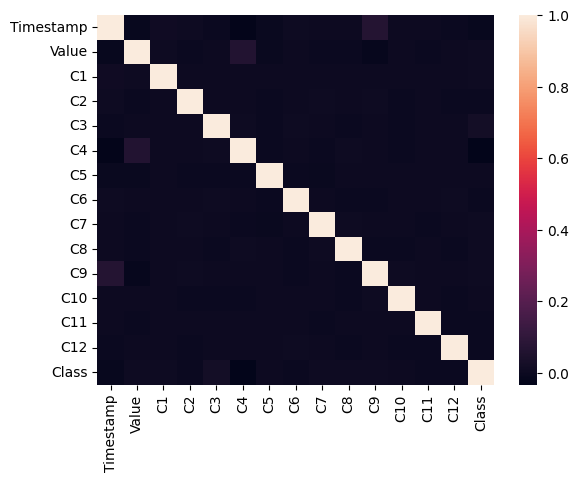

In [16]:
sns.heatmap(transactions_data.corr())

### Contamination: Hyperparameter for Isolation Forest

In [17]:
fraud = transactions_data[transactions_data['Class'] == 1]
valid = transactions_data[transactions_data['Class'] == 0]
contamination = len(fraud)/float(len(valid))
print(contamination)

0.0018104145348379571


# 1. Anomaly Dection using Isolation Forest

In [19]:
X = transactions_data.drop('Class', axis=1)
y = transactions_data['Class']
iso = IsolationForest(max_samples=len(X), contamination=contamination, n_estimators=500)
iso.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0018104145348379571, max_samples=140000,
                n_estimators=500)

In [20]:
scores = iso.decision_function(X)
scores

array([0.15945575, 0.1343628 , 0.14016221, ..., 0.13432366, 0.16701118,
       0.16069895])

<Axes: >

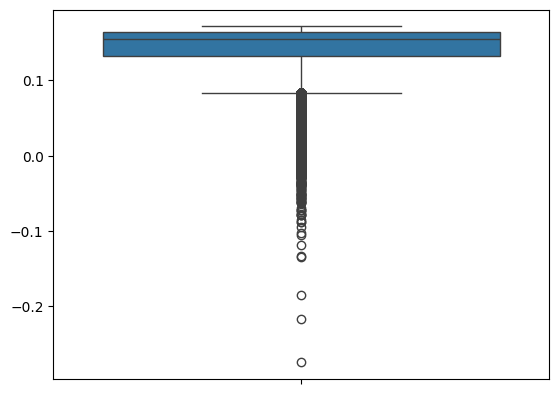

In [21]:
sns.boxplot(scores)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 7.0000e+00, 1.0000e+01,
        8.0000e+00, 9.0000e+00, 1.5000e+01, 2.1000e+01, 3.0000e+01,
        3.8000e+01, 3.4000e+01, 5.6000e+01, 6.6000e+01, 9.7000e+01,
        1.1600e+02, 1.5900e+02, 1.7600e+02, 2.4500e+02, 3.0000e+02,
        4.1600e+02, 4.5700e+02, 5.8200e+02, 6.5400e+02, 8.7800e+02,
        1.0880e+03, 1.3190e+03, 1.8460e+03, 2.4200e+03, 3.4290e+03,
        4.3400e+03, 5.3130e+03, 6.0290e+03, 6.5690e+03, 7.2000e+03,
        8.3990e+03, 1.1425e+04, 1.8399e+04, 3.1232e+04, 2.6597e+04]),
 array([-0.27457262, -0.26819943, -0.26182625,

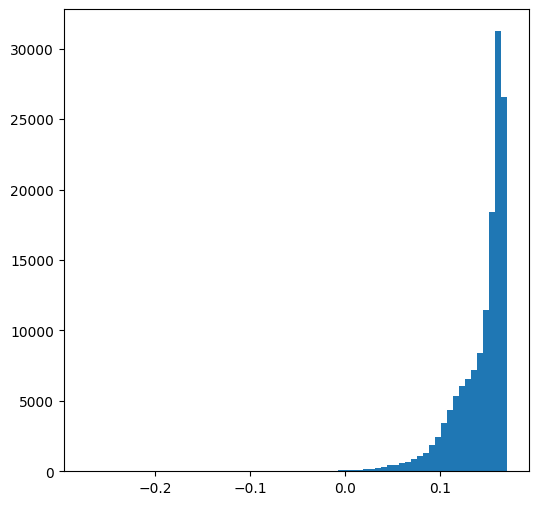

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(scores, bins=70)

In [24]:
transactions_data['scores'] = scores
transactions_data

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class,scores
0,152212.22220,1.816,13.245219,-0.019520,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0,0.159456
1,159074.44440,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,0.023023,0.062966,0.130546,-0.303582,-0.019975,0.007491,0,0.134363
2,43127.77778,24.000,-9.067399,0.762501,-1.739613,0.052481,-0.101681,-88.000000,0.117912,-0.005629,0.358812,-0.367016,-0.019975,361.000000,0,0.140162
3,156042.22220,8.000,8.728304,-0.382673,-1.739613,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,-0.019975,-1.654373,0,0.132047
4,154720.00000,59.496,7.657141,0.150611,-1.739613,-0.034883,0.826100,0.357556,0.147640,-0.005629,0.080491,-0.693792,-0.308631,0.563570,0,0.165099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,183231.11110,102.680,26.000000,-0.230035,-7.050312,0.017126,0.101611,2.443864,-0.068998,0.159159,-0.106062,0.342779,-0.011073,0.809047,0,0.158428
139996,169976.66670,9.848,5.329287,-0.151293,8.303946,-0.004504,-0.040837,1.323421,0.083422,0.007135,-0.179373,-0.157173,0.318506,-1.106630,0,0.166094
139997,40377.77778,3.072,-4.025570,-0.468904,-275.000000,0.014959,0.296391,0.609542,0.070729,-0.005629,0.029990,0.438644,-0.026816,-0.107358,0,0.134324
139998,58136.66667,12.800,-7.357232,0.319784,-6.087797,0.018416,0.167421,0.279868,-0.018847,-0.005629,-0.228823,0.215016,-0.027304,-1.354674,0,0.167011


In [25]:
transactions_data.query('scores < 0.0030')

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class,scores
910,45451.111110,0.792,-1826.000000,-0.032859,-7.865014,-0.012218,-433.000000,-0.792182,-0.005377,-0.007043,-0.374519,1.255514,-1792.000000,-0.287705,0,-0.038483
1193,45897.777780,0.608,64.555098,-2.327810,-489.000000,-0.135890,0.000903,3.789328,1138.000000,0.526672,-0.345878,-0.700862,0.208750,-0.430966,1,-0.002902
1398,105873.333300,15128.000,77.000000,-4.517892,-43.917155,0.268036,-15.840229,-8.221799,-19.583504,-0.329947,-0.810383,-0.712189,-3.985156,29.000000,0,-0.185368
1446,129866.666700,720.000,10.856407,-461.000000,6.782110,-0.002840,-0.812546,0.235329,-0.842303,-0.007872,-0.110698,-490.000000,492.000000,-0.114063,0,-0.021032
1519,41758.888890,60.064,-3.000000,-0.757108,-349.000000,0.028129,0.059588,0.469915,-335.000000,-343.000000,0.039154,-0.652869,1660.000000,0.318889,0,-0.018791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139180,4357.777778,23.992,1867.000000,-348.000000,-1.739613,-0.001569,-0.020300,-0.154585,-1424.000000,-0.055810,-0.444635,0.421162,-0.019975,-0.801174,0,-0.038686
139217,30408.888890,1.216,1691.000000,-0.746950,-1.851944,0.014905,0.048262,-0.895650,0.023023,0.052473,-0.208837,0.042148,-1975.000000,-872.000000,0,-0.006421
139237,150303.333300,159.920,-6.073986,0.295812,16.684429,0.040521,-482.000000,1133.000000,-0.147470,0.009568,0.021088,-466.000000,-0.504127,-0.340892,0,-0.025354
139530,90080.000000,118.400,-1.267381,-425.000000,11.620774,0.041058,-0.221097,-1785.000000,0.104905,-0.005629,-0.193661,-334.000000,-0.094434,0.354757,0,-0.017334


# Anomaly Detections Using Local Outlier Factor (LOF)

In [27]:
transactions_data = transactions_data.drop('scores', axis=1)

In [28]:
transactions_data.head()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,152212.22220,1.816,13.245219,-0.019520,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0
1,159074.44440,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,0.023023,0.062966,0.130546,-0.303582,-0.019975,0.007491,0
2,43127.77778,24.000,-9.067399,0.762501,-1.739613,0.052481,-0.101681,-88.000000,0.117912,-0.005629,0.358812,-0.367016,-0.019975,361.000000,0
3,156042.22220,8.000,8.728304,-0.382673,-1.739613,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,-0.019975,-1.654373,0
4,154720.00000,59.496,7.657141,0.150611,-1.739613,-0.034883,0.826100,0.357556,0.147640,-0.005629,0.080491,-0.693792,-0.308631,0.563570,0


### Setting Up LOF

In [30]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
y_pred = lof.fit_predict(X)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

### LOF Visualization

In [32]:
X_array = X.to_numpy()
y_index = np.where(y_pred == -1)
X_outliers = X_array[y_index]
X_outliers

array([[ 1.69492222e+05,  4.88000000e+00, -6.70446709e+00, ...,
        -9.44606319e-01, -1.99746360e-02, -7.34109907e-01],
       [ 4.19000000e+03,  2.16080000e+01, -3.09516211e+00, ...,
         3.47864085e-01, -1.07654152e-01,  7.38671894e-01],
       [ 1.00092222e+05,  7.53600000e+00, -1.92029472e+00, ...,
        -5.30354387e-01, -1.99746360e-02,  1.29300000e+03],
       ...,
       [ 1.60988889e+04,  1.27600000e+01, -9.40830258e+00, ...,
         4.12786320e-02,  1.13128618e-01, -1.40000000e+02],
       [ 1.90295556e+05,  2.17600000e+00,  6.16262999e+00, ...,
         3.20203631e-01, -1.99746360e-02, -6.86359270e-02],
       [ 2.21333333e+04,  9.48000000e+00, -1.25001363e+00, ...,
        -4.46196296e-01, -1.99746360e-02,  1.15791258e+00]])

### Plotting Outliers

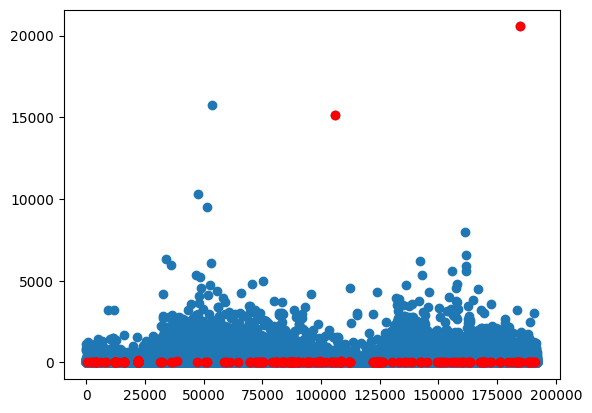

In [34]:
plt.scatter(X_array[:, 0], X_array[:, 1])
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red')
plt.show()